# Probability Distributions

This notebook shows some of the probability distributions available in ROOT. 
Information on the PDF avaialable in ROOT is at https://root.cern.ch/doc/master/group__StatFunc.html

Examples of using the cumulative distribution functions (CDF) and their inverse  are also provided. 

In [1]:
TF1 * f; 
TF1 * g; 
TLine* line; 

## Normal Distribution

In [2]:
f = new TF1("f","TMath::Gaus(x,[mean],[sigma])");

Alternative definiton available in ROOT. This will provide the probability distribution function (normalized gaussian)

In [3]:
f = new TF1("pdf","ROOT::Math::normal_pdf(x,[sigma],[mean])");

In [4]:
f->SetParameter("mean",0);
f->SetParameter("sigma",1);
f->SetRange(-5,5);
f->SetNpx(1000);

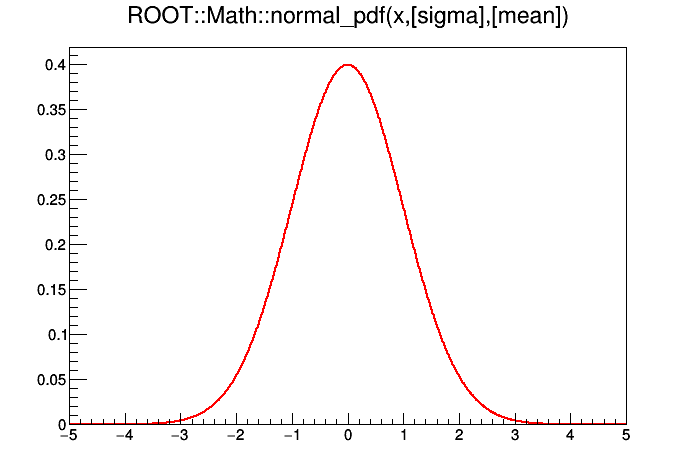

Info in <TCanvas::MakeDefCanvas>:  created default TCanvas with name c1


In [5]:
f->Draw();
gPad->Draw();

## $\chi^2$ Distribution

In [6]:
f = new TF1("pdf","ROOT::Math::chisquared_pdf(x,[ndf)");

In [7]:
f->SetParameter("ndf",3);
f->SetRange(0,10);
f->SetNpx(1000);

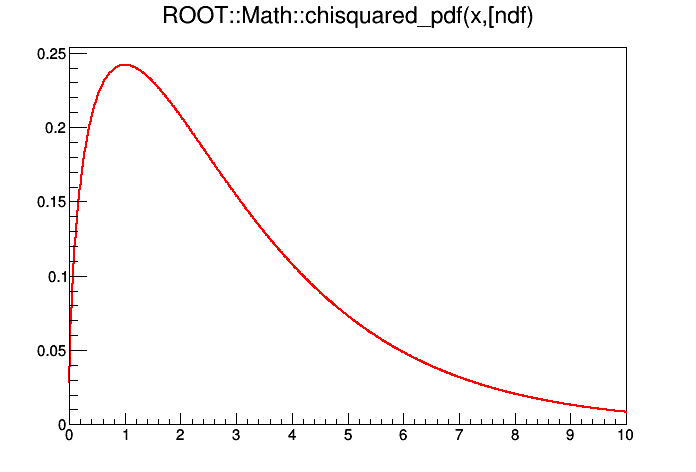

In [8]:
f->Draw(); gPad->Draw();

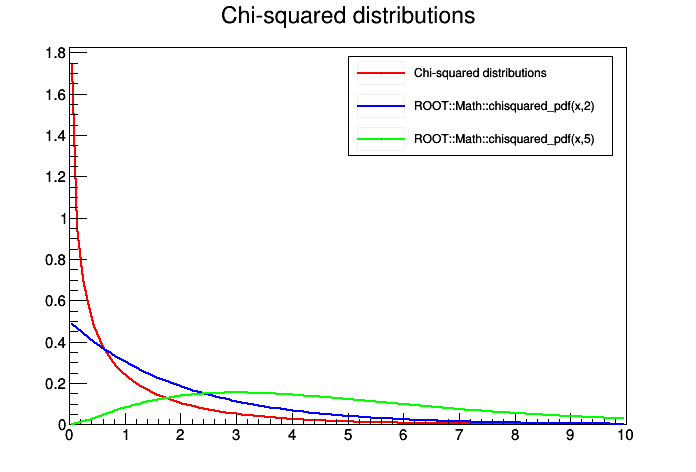

In [9]:
f1 = new TF1("pdf2","ROOT::Math::chisquared_pdf(x,1)",0,10);
f1->SetTitle("Chi-squared distributions");
f1->Draw();
f2 = new TF1("pdf2","ROOT::Math::chisquared_pdf(x,2)",0,10);
f2->SetLineColor(kBlue);
f2->Draw("same");
f3 = new TF1("pdf3","ROOT::Math::chisquared_pdf(x,5)",0,10);
f3->SetLineColor(kGreen);
f3->Draw("same");
gPad->BuildLegend(); 
gPad->Draw();
    

## Cumulative Distribution Functions

The cumulative distributions represent the integral functions of the probability distribution functions.
Two types of cumulative distributions are available in ROOT
 1. Left Tail integral functions, e.g. `ROOT::Math::normal_cdf(x, sigma, mean)` 
 2. Right Tail integral functions, e.g. `ROOT::Math::normal_cdf_c(x, sigma, mean)`

In [10]:
f = new TF1("pdf","ROOT::Math::chisquared_pdf(x,3)",0,10);

In [11]:
cdf1 = new TF1("cdf","ROOT::Math::chisquared_cdf(x,3)",0,10);
cdf1->SetLineColor(kBlue);
cdf1->Draw();

In [12]:
cdf2 = new TF1("cdfc","ROOT::Math::chisquared_cdf_c(x,3)",0,10);
cdf2->SetLineColor(kBlue+4);
cdf2->Draw("SAME");

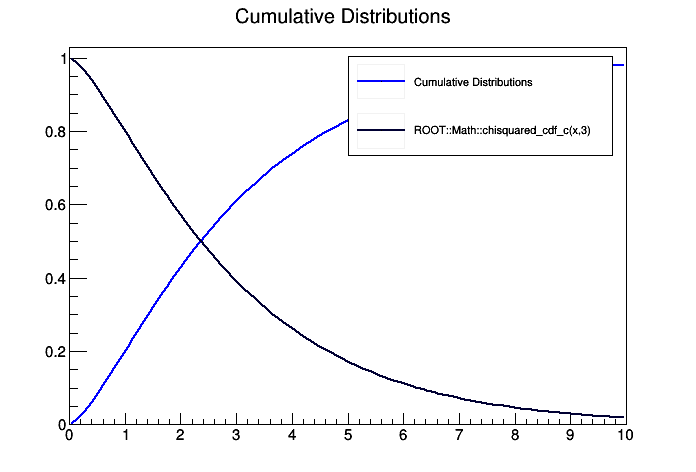

In [13]:
cdf1->SetTitle("Cumulative Distributions");
gPad->BuildLegend();
gPad->Draw();

## Quantile distributions

Quantile distributions are instead the inverse of the cumulative distributions. Theuy compute the corresponding value given a probability. 

In [14]:
qf1 = new TF1("cdf","ROOT::Math::chisquared_quantile(x,3)",0,1);
qf1->SetLineColor(kBlue);
qf1->Draw();

In [15]:
qf2 = new TF1("cdf","ROOT::Math::chisquared_quantile_c(x,3)",0,1);
qf2->SetLineColor(kBlue+4);
qf2->Draw("SAME");

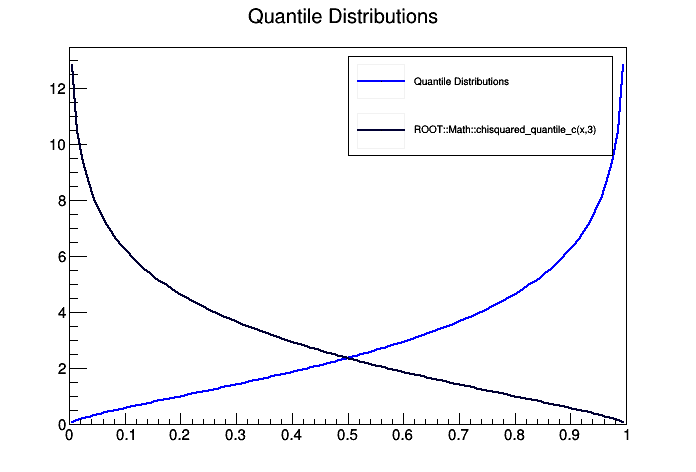

In [16]:
qf1->SetTitle("Quantile Distributions");
gPad->BuildLegend();
gPad->Draw();

## Example on using cumulative distribution functions

The resulting $\chi^2$ of an experiment with 3  degree of freedom is 11.3

Compute the p-value and the corresponding significance, expressed as Gaussian $\sigma$'s

In [17]:
chi2_value = 11.3; 
ndf = 3;

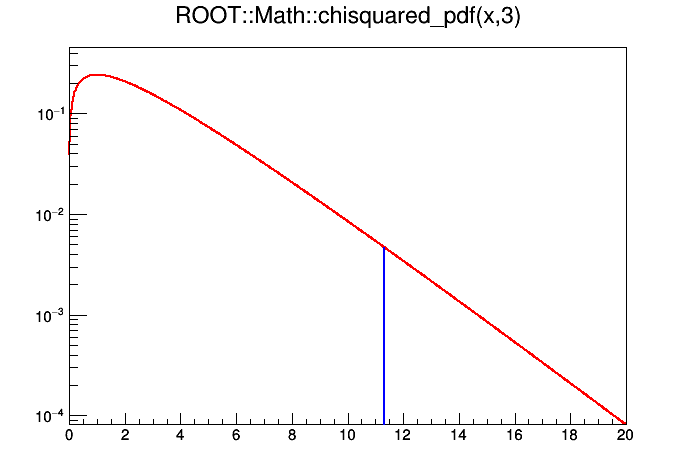

In [18]:
f = new TF1("pdf","ROOT::Math::chisquared_pdf(x,3)",0,20);
f->SetNpx(1000);
f->Draw(); 
line = new TLine(chi2_value,0., chi2_value, ROOT::Math::chisquared_pdf(chi2_value,3));
line->SetLineColor(kBlue); 
line->SetLineWidth(2);
line->Draw();
gPad->SetLogy();
gPad->Draw();

#### Compute p-value using the cumulative of the chi-squared distribution (right tail integral)

In [19]:
p_value = ROOT::Math::chisquared_cdf_c(chi2_value, ndf)

(double) 0.010209


#### Compute the corresponding sigma-value using the quantile of the normal distribution $N(0,1)$

In [20]:
double significance_value = ROOT::Math::normal_quantile_c(p_value, 1.)

(double) 2.318558


In [21]:
fg = new TF1("g","ROOT::Math::normal_pdf(x,1)",-4,4);
fg->SetNpx(1000);
fg->Draw(); 

In [22]:
double y = ROOT::Math::normal_pdf(significance_value,1)

(double) 0.027139


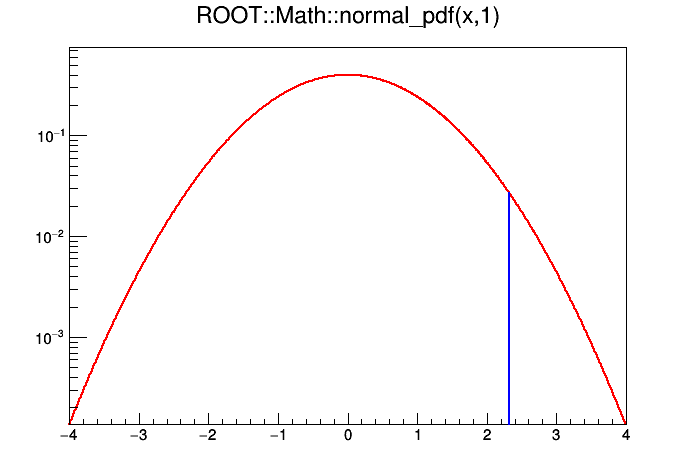

In [23]:
l = new TLine(significance_value, 0.0, significance_value, y);
l->SetLineColor(kBlue); 
l->SetLineWidth(2);
l->Draw();
gPad->Draw();